In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import random

In [2]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 30)
        self.linear2 = nn.Linear(30, 30)
        self.linear3 = nn.Linear(30, 1)
        
    def forward(self, x):
        x = nn.ReLU()(self.linear1(x))
        x = nn.ReLU()(self.linear2(x))
        x = self.linear3(x)
        return x
    
def infer(model, data):
    with torch.inference_mode():
        if type(data) == tuple:
            return model(*data)
        return model(data)

In [37]:
def classify_circle(x1, x2):
    if x1**2+x2**2<=1:
        return 1
    return 0

def classify(x1, x2): #dataset - squares
    if np.sin(np.pi * x1) * np.sin(np.pi * x2)< 0:
        return 1
    return 0

X_train = torch.empty(100, 2)
Y_train = torch.zeros(100)
for i in range(100):
    X_train[i][0] = dataset[i][0][1]
    X_train[i][1] = dataset[i][0][0]
    Y_train[i] = dataset[i][1]

'''    randomly generated dataset
for i in range(100):
    x1 = random.uniform(-1.5, 1.5)
    x2 = random.uniform(-1.5, 1.5)
    X_train[i][0] = x1
    X_train[i][1] = x2
    Y_train[i] = classify(x1, x2)
''' 
X_test = torch.empty(100, 2)
Y_test = torch.zeros(100)
for i in range(100):
    x1 = random.uniform(-1.5, 1.5)
    x2 = random.uniform(-1.5, 1.5)
    X_test[i][0] = x1
    X_test[i][1] = x2
    Y_test[i] = classify(x1, x2)

In [38]:
Y_train[4]

tensor(0.)

In [39]:
def Accuracy(model, X, Y):
    total = 0
    for i, x in enumerate(X):
        if Y[i].item() == 1:
            if model(x) >= 0.5:
                total += 1
        elif model(x) <= 0.5:
            total += 1
    return total / len(X)

def Cost(model, X, Y):
    total = 0
    for i, x in enumerate(X):
        total += (model(x)-Y[i])**2
    return total / 2

In [40]:
model = Network()

In [41]:
model.train()

loss_fn = nn.MSELoss()
optimizer  = torch.optim.SGD(params = model.parameters(),
                             lr = 0.02)
epochs = 1000
batch_size = 10

acc = Accuracy(model, X_test, Y_test)
cost = Cost(model, X_test, Y_test).item()
print(f'Cost: {cost:.5f}, Accuracy: {acc:.3f}')

for epoch in range(epochs):
    count = 0
    while count < len(X_train):
    
        logits = model(X_train[count : count + batch_size]).squeeze()
        optimizer.zero_grad()
        loss = loss_fn(logits, Y_train[count : count + batch_size])
        loss.backward()
        optimizer.step()
        
        count += batch_size
        
    if epoch % 10 == 0:
        acc = Accuracy(model, X_test, Y_test)
        cost = Cost(model, X_test, Y_test).item()
        print(f'Iter: {epoch},  Cost: {cost:.5f}, Accuracy: {acc:.3f}')
        

Cost: 30.40130, Accuracy: 0.550
Iter: 0,  Cost: 12.67864, Accuracy: 0.600
Iter: 10,  Cost: 13.23692, Accuracy: 0.440
Iter: 20,  Cost: 13.31516, Accuracy: 0.460
Iter: 30,  Cost: 13.28089, Accuracy: 0.460
Iter: 40,  Cost: 13.19764, Accuracy: 0.470
Iter: 50,  Cost: 13.08697, Accuracy: 0.510
Iter: 60,  Cost: 12.99087, Accuracy: 0.540
Iter: 70,  Cost: 12.90078, Accuracy: 0.580
Iter: 80,  Cost: 12.81549, Accuracy: 0.570
Iter: 90,  Cost: 12.71526, Accuracy: 0.580
Iter: 100,  Cost: 12.62758, Accuracy: 0.590
Iter: 110,  Cost: 12.53274, Accuracy: 0.600
Iter: 120,  Cost: 12.42760, Accuracy: 0.610
Iter: 130,  Cost: 12.33559, Accuracy: 0.600
Iter: 140,  Cost: 12.23983, Accuracy: 0.600
Iter: 150,  Cost: 12.13502, Accuracy: 0.610
Iter: 160,  Cost: 12.02990, Accuracy: 0.610
Iter: 170,  Cost: 11.91672, Accuracy: 0.610
Iter: 180,  Cost: 11.77997, Accuracy: 0.610
Iter: 190,  Cost: 11.65401, Accuracy: 0.610
Iter: 200,  Cost: 11.52183, Accuracy: 0.610
Iter: 210,  Cost: 11.36787, Accuracy: 0.610
Iter: 220, 

In [42]:
cont = []
for x in range(51):
    for y in range(51):
        cont.append(model(torch.tensor([x*0.06-1.5, y*0.06-1.5])).item())

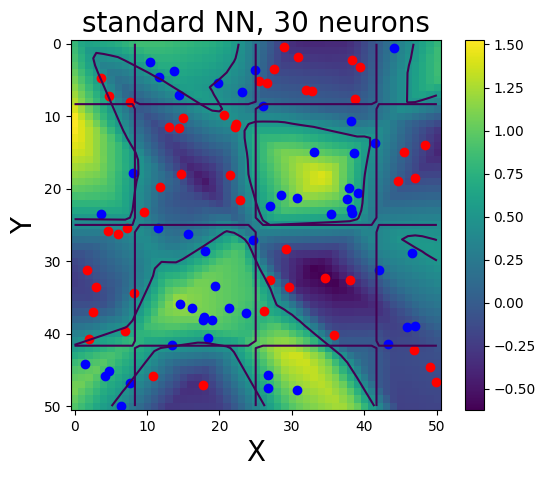

In [45]:
cx = np.linspace(-1,1,100)
cy = []
for i in cx:
    cy.append(np.sqrt(1-i**2))
cy = np.array(cy)
cx = cx*17 + 25.5
cy = cy*17 + 25.5

data = [[cont[j*51 + i] for j in range(51)] for i in range(51)]

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(data)
cbar = fig.colorbar(im)
ax.contour(data, [0.5])
ax.contour(Z, [0])

for p in dataset:
    if p[1] == 0:
        ax.scatter((p[0][0]+1.5)*50/3, (p[0][1]-1.5)*50/3+50, c = "red")
    else:
        ax.scatter((p[0][0]+1.5)*50/3, (p[0][1]-1.5)*50/3+50, c = "blue")

#ax.plot(cx, cy, c = "cyan")
#ax.plot(cx, -cy+51, c="cyan")
ax.set_xlabel("X", fontsize = 20)
ax.set_ylabel("Y", fontsize = 20)
ax.set_title("standard NN, 30 neurons", fontsize = 20)

#plt.savefig("C:\\Users\\Andrzej Socha\\Desktop\\FHN NN Results\\Base\\square\\standard NN, 30 n, square, 1000 iters.svg", bbox_inches = "tight")

In [27]:
n = 51
Z = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        Z[i][j] = np.sin(np.pi * (1.5 - (i*3/(n-1)))) * np.sin(np.pi * (j*3/(n-1) - 1.5))

In [31]:
path = "C:\\Users\\Andrzej Socha\\Desktop\\FHN NN Results\\Base\\square\\dataset.txt"

with open(path, "r") as f:
    data_raw = f.readline(1000000)
    data = data_raw
    data = data_raw.split("_")

dataset = [eval(x) for x in data]

In [36]:
dataset[0][0]

(1.49155, 1.29767)